**Step-by-Step Implementation of Simple and Multi Layer Perceptron**
1. Import Necessary Libraries
2. Load and Preprocess Data
3. Define and Train Simple Perceptron
4. Define and Train Multi-Layer Perceptron
5. Evaluate Both Models

**Step 1: Import Necessary Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

**Step 2: Load and Preprocess Data**

In [2]:
# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)


**Step 3: Define and Train Simple Perceptron**

In [4]:
# Build the Simple Perceptron model
simple_perceptron = Sequential([
    Dense(3, activation='softmax', input_shape=(X_train.shape[1],))
])

# Compile the model
simple_perceptron.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Train the Simple Perceptron model
history_simple = simple_perceptron.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=5, verbose=1)


Epoch 1/20
20/20 [==============================] - 1s 13ms/step - loss: 1.0420 - accuracy: 0.3958 - val_loss: 1.1765 - val_accuracy: 0.3750
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.9956 - accuracy: 0.5000 - val_loss: 1.1342 - val_accuracy: 0.3750
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.9531 - accuracy: 0.6146 - val_loss: 1.0927 - val_accuracy: 0.4167
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.9148 - accuracy: 0.6354 - val_loss: 1.0574 - val_accuracy: 0.4583
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 0.8804 - accuracy: 0.6562 - val_loss: 1.0210 - val_accuracy: 0.5000
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 0.8504 - accuracy: 0.6875 - val_loss: 0.9882 - val_accuracy: 0.5417
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.8216 - accuracy: 0.6979 - val_loss: 0.9606 - val_accuracy: 0.5833
Epoch 8/20
20/20 [=

**Step 4: Define and Train Multi-Layer Perceptron**

In [6]:
# Build the Multi-Layer Perceptron model
mlp = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
mlp.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the Multi-Layer Perceptron model
history_mlp = mlp.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=5, verbose=1)


Epoch 1/20
20/20 [==============================] - 1s 13ms/step - loss: 0.9118 - accuracy: 0.5312 - val_loss: 0.8543 - val_accuracy: 0.6250
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.8312 - accuracy: 0.6771 - val_loss: 0.7969 - val_accuracy: 0.7083
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.7768 - accuracy: 0.6875 - val_loss: 0.7523 - val_accuracy: 0.7083
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.7287 - accuracy: 0.7083 - val_loss: 0.7088 - val_accuracy: 0.7500
Epoch 5/20
20/20 [==============================] - 0s 5ms/step - loss: 0.6830 - accuracy: 0.7396 - val_loss: 0.6722 - val_accuracy: 0.8333
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 0.6399 - accuracy: 0.7396 - val_loss: 0.6359 - val_accuracy: 0.8333
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5989 - accuracy: 0.7708 - val_loss: 0.6029 - val_accuracy: 0.8333
Epoch 8/20
20/20 [=

**Step 5: Evaluate Both Models**

Simple Perceptron Test Accuracy: 76.67%


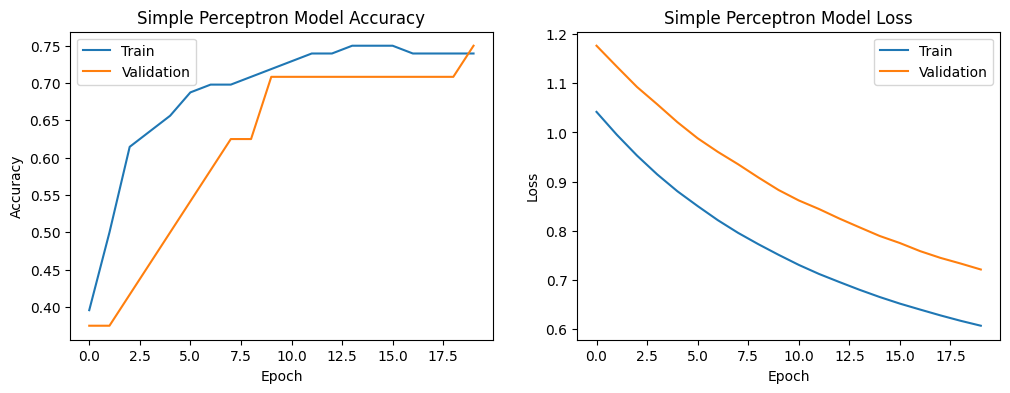

Multi-Layer Perceptron Test Accuracy: 90.00%


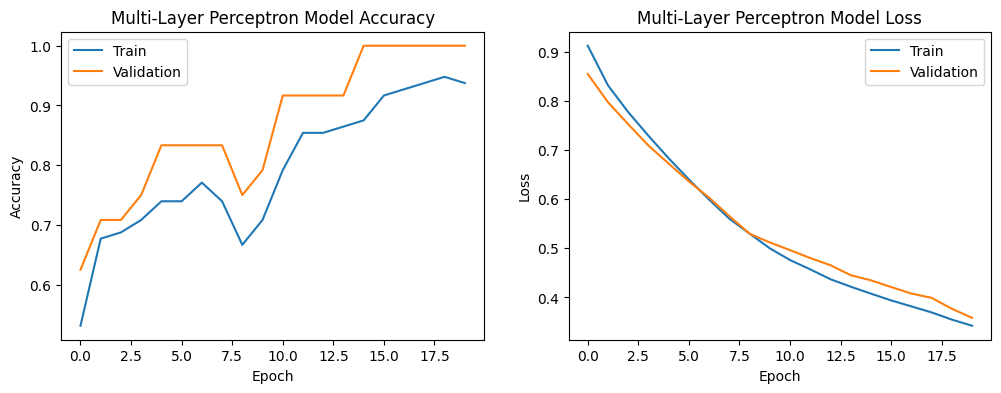

In [8]:
# Function to evaluate the model and plot accuracy and loss
def evaluate_and_plot_model(model, history, X_test, y_test, title):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{title} Test Accuracy: {accuracy * 100:.2f}%")

    # Plot accuracy and loss
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

# Evaluate and plot results for Simple Perceptron
evaluate_and_plot_model(simple_perceptron, history_simple, X_test, y_test, 'Simple Perceptron')

# Evaluate and plot results for Multi-Layer Perceptron
evaluate_and_plot_model(mlp, history_mlp, X_test, y_test, 'Multi-Layer Perceptron')
